Index(['Processo', 'Classe/Assunto', 'Relator(a)', 'Comarca', 'Órgão julgador',
       'Data do julgamento', 'Data de publicação', 'Ementa', 'ano_julgamento'],
      dtype='object')
398
ano_julgamento
2001     2
2002     5
2003     5
2004     5
2005     4
2006    17
2007    21
2008    16
2009    19
2010    22
2011    23
2012    16
2013    14
2014    18
2015    19
2016    30
2017    25
2018    37
2019    27
2020    23
2021    30
2022    20
Name: Processo, dtype: int64


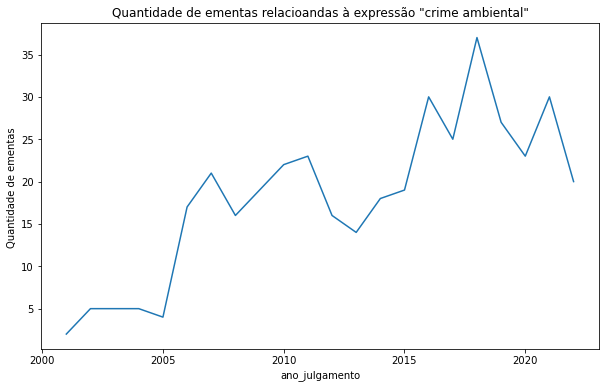

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#lê o arquivo CSV "ambientalSemRepetir.csv" e cria um novo DataFrame chamado df.
df = pd.read_csv('ambientalSemRepetir.csv')
# Função para fazer o parsing da data
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')

# Carregar o arquivo CSV com as datas
df = pd.read_csv('ambientalSemRepetir.csv', parse_dates=['Data do julgamento', 'Data de publicação'], date_parser=dateparse)

# Limpar espaços em branco nos valores das colunas de tipo string (object)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Extrair o ano da coluna "Data do julgamento" e cria nova coluna
df['ano_julgamento'] = df['Data do julgamento'].dt.year

#busca as ocorrências da palavra crime nas ementas
df_crime = df.loc[df['Ementa'].str.contains('crime ambiental', case=False)]
print(df_crime.columns)
# Agrupar os processos por ano do julgamento e contar a quantidade de processos em cada ano
contagem_processos_crime_ano = df_crime.groupby('ano_julgamento')['Processo'].count()
print(contagem_processos_crime_ano.sum())
# Criar um gráfico de série temporal
contagem_processos_crime_ano.plot(figsize=(10, 6))
print(contagem_processos_crime_ano)

#plt.xlabel('Ano do Julgamento')
plt.ylabel('Quantidade de ementas ')
plt.title('Quantidade de ementas relacioandas à expressão "crime ambiental"')
plt.savefig('grafico_temporal_crime.png')
plt.show()

#print(df_crime)
#print(df_crime.columns)
#print(df_crime.sum())


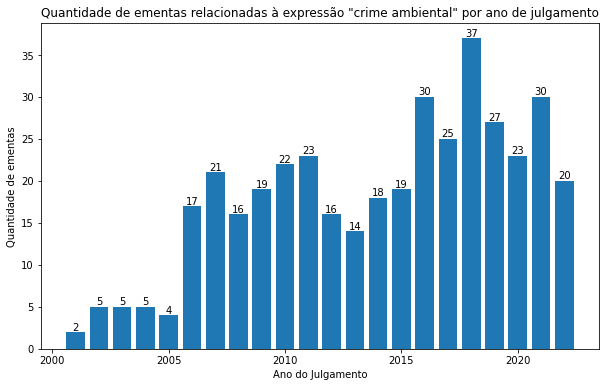

In [3]:

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_processos_crime_ano.index, contagem_processos_crime_ano.values)

plt.xlabel('Ano do Julgamento')
plt.ylabel('Quantidade de ementas')
plt.title('Quantidade de ementas relacionadas à expressão "crime ambiental" por ano de julgamento')

# Adicionar as quantidades acima de cada barra
for i, v in enumerate(contagem_processos_crime_ano.values):
    plt.text(contagem_processos_crime_ano.index[i], v, str(v), ha='center', va='bottom')

plt.savefig('grafico_barras_crime.png')
plt.show()


#print(contagem_processos_crime_ano)


398


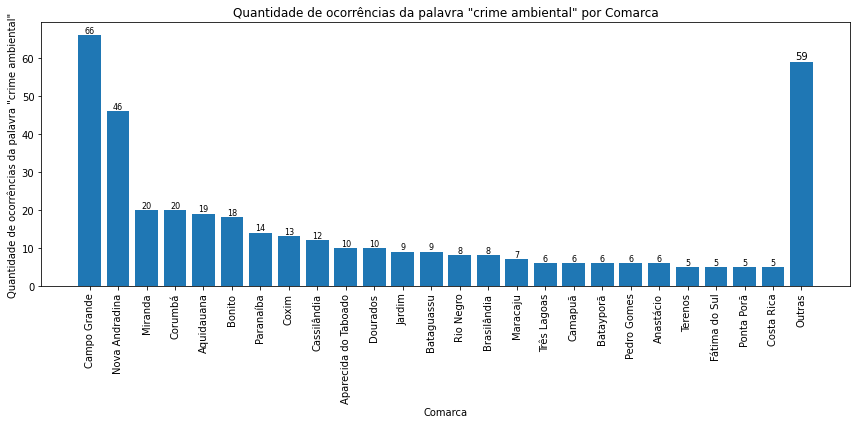

Campo Grande            66
Nova Andradina          46
Miranda                 20
Corumbá                 20
Aquidauana              19
Bonito                  18
Paranaíba               14
Coxim                   13
Cassilândia             12
Aparecida do Taboado    10
Dourados                10
Jardim                   9
Bataguassu               9
Rio Negro                8
Brasilândia              8
Maracaju                 7
Três Lagoas              6
Camapuã                  6
Batayporã                6
Pedro Gomes              6
Anastácio                6
Terenos                  5
Fátima do Sul            5
Ponta Porã               5
Costa Rica               5
Outras                  59
dtype: int64


In [4]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências da palavra "crime" por comarca
contagem_crime_comarca = df_crime['Comarca'].value_counts()
contagem_crime_comarca_soma = df_crime['Comarca'].value_counts().sum()
print(contagem_crime_comarca_soma)


# Filtrar comarcas com valores acima de 4
comarcas_relevantes = contagem_crime_comarca[contagem_crime_comarca > 4]

# Calcular o total de ocorrências das comarcas irrelevantes
total_comarcas_irrelevantes = contagem_crime_comarca[contagem_crime_comarca <= 4].sum()

# Criar uma nova série com as comarcas relevantes e "Outras"
comarcas_agrupadas = pd.concat([comarcas_relevantes, pd.Series(total_comarcas_irrelevantes, index=['Outras'])])

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(comarcas_agrupadas.index, comarcas_agrupadas.values)

plt.xlabel('Comarca')
plt.ylabel('Quantidade de ocorrências da palavra "crime ambiental"')
plt.title('Quantidade de ocorrências da palavra "crime ambiental" por Comarca')

# Adicionar as quantidades acima de cada barra
for i, v in enumerate(comarcas_agrupadas.values):
    if i == len(comarcas_agrupadas) - 1:
        plt.text(i, v, str(v), ha='center', va='bottom')
    else:
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('grafico_barras_crime_comarcas1.png')
plt.show()

print(comarcas_agrupadas)


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Criar um objeto CountVectorizer
vectorizer = CountVectorizer(binary=True)  # Definir binary=True para contar apenas uma vez por linha

# Criar a matriz de palavras
matriz_palavras = vectorizer.fit_transform(df_crime['Ementa'])

# Obter o vocabulário (lista de termos)
vocabulario = vectorizer.get_feature_names_out()

# Calcular a contagem total de ocorrências de cada palavra
contagem_total_ocorrencias = matriz_palavras.sum(axis=0).tolist()[0]

# Criar o DataFrame com as palavras e a contagem total de ocorrências
tabela_ocorrencias = pd.DataFrame({'Palavra': vocabulario, 'Total Ocorrências': contagem_total_ocorrencias})

# Ordenar a tabela por contagem total de ocorrências em ordem decrescente
tabela_ocorrencias = tabela_ocorrencias.sort_values(by='Total Ocorrências', ascending=False)

# Exibir a tabela
print(tabela_ocorrencias)

# Salvar a tabela de ocorrências em um arquivo Excel
tabela_ocorrencias.to_excel('matrizPalavrasCrime.xlsx', index=False)

          Palavra  Total Ocorrências
416     ambiental                398
1220        crime                398
1735       ementa                398
1295           de                375
1275           da                354
...           ...                ...
3131    ocasionou                  1
3130  ocasionando                  1
3129    ocasional                  1
3128  ocasionados                  1
2895    melhorias                  1

[4619 rows x 2 columns]


Index(['Processo', 'Classe/Assunto', 'Relator(a)', 'Comarca', 'Órgão julgador',
       'Data do julgamento', 'Data de publicação', 'Ementa', 'ano_julgamento'],
      dtype='object')


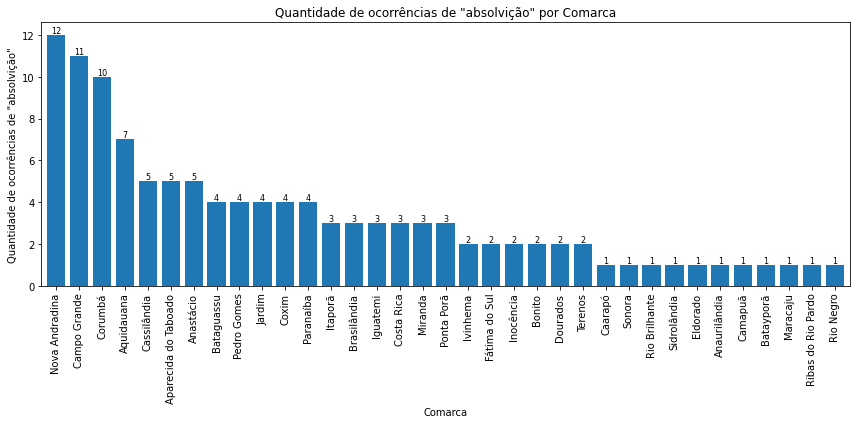

                       Processo             Comarca  ano_julgamento
12    0000484-40.2018.8.12.0045         Sidrolândia            2022
60    0000071-55.2020.8.12.0013              Jardim            2022
92    0000501-88.2018.8.12.0041  Ribas do Rio Pardo            2022
99    0003183-81.2019.8.12.0008             Corumbá            2022
110   0047794-53.2013.8.12.0001        Campo Grande            2022
...                         ...                 ...             ...
2035  0003048-65.2002.8.12.0008             Corumbá            2004
2043  0000460-31.2001.8.12.0005          Aquidauana            2003
2048  0001693-79.2000.8.12.0011               Coxim            2003
2051  0001588-11.1963.8.12.0008             Corumbá            2002
2053  0000490-42.2001.8.12.0013              Jardim            2002

[116 rows x 3 columns]


In [89]:
import matplotlib.pyplot as plt
print(df_crime.columns)
# Filtrar as linhas que contêm a palavra 'absolvição'
df_absolvicao = df_crime[df_crime['Ementa'].str.contains('absolvição', case=False)]

# Calcular a contagem de linhas por comarca
contagem_comarcas = df_absolvicao['Comarca'].value_counts()

# Aumentar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
contagem_comarcas.plot(kind='bar', width=0.8)  # Ajustar a largura das barras conforme necessário

plt.xlabel('Comarca')
plt.ylabel('Quantidade de ocorrências de "absolvição"')
plt.title('Quantidade de ocorrências de "absolvição" por Comarca')

# Adicionar as quantidades acima de cada barra
for i, v in enumerate(contagem_comarcas.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=90)

plt.tight_layout()


plt.savefig('grafico_barras_absolvicao1.png')
# Exibir o gráfico de barras
plt.show()


# Criar a tabela com as três colunas desejadas
tabela_absolvicao = df_absolvicao[['Processo', 'Comarca', 'ano_julgamento']]
print(tabela_absolvicao)

# Salvar a tabela de ocorrências em um arquivo Excel
tabela_absolvicao.to_excel('matrizPalavrasCrime2.xlsx', index=False)



Index(['Processo', 'Classe/Assunto', 'Relator(a)', 'Comarca', 'Órgão julgador',
       'Data do julgamento', 'Data de publicação', 'Ementa', 'ano_julgamento'],
      dtype='object')
Campo Grande            17
Miranda                  8
Nova Andradina           6
Aparecida do Taboado     5
Cassilândia              5
Corumbá                  4
Paranaíba                4
Bonito                   4
Bataguassu               3
Maracaju                 3
Ponta Porã               3
Rio Negro                2
Terenos                  2
Aquidauana               2
Brasilândia              2
Inocência                2
Iguatemi                 2
Camapuã                  2
Agua Clara               2
Jardim                   2
São Gabriel do Oeste     1
Pedro Gomes              1
Anastácio                1
Fátima do Sul            1
Ivinhema                 1
Sonora                   1
Porto Murtinho           1
Nova Alvorada do Sul     1
Itaporã                  1
Nioaque                  1
Ribas do

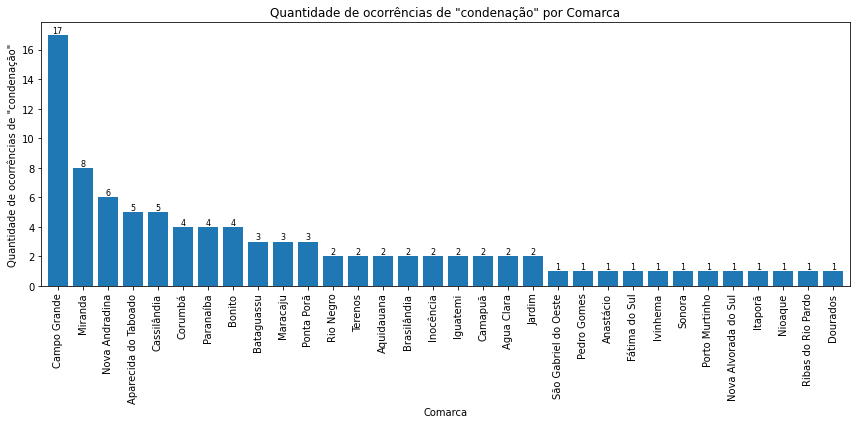

                       Processo               Comarca  ano_julgamento
13    0033639-69.2018.8.12.0001          Campo Grande            2022
14    0001227-81.2022.8.12.0054  Nova Alvorada do Sul            2022
22    0031679-49.2016.8.12.0001          Campo Grande            2022
60    0000071-55.2020.8.12.0013                Jardim            2022
84    0001689-42.2014.8.12.0014              Maracaju            2022
...                         ...                   ...             ...
2006  0000008-23.1940.8.12.0049            Agua Clara            2006
2015  0000261-94.2002.8.12.0030           Brasilândia            2005
2035  0003048-65.2002.8.12.0008               Corumbá            2004
2036  0008120-85.2001.8.12.0002              Dourados            2004
2055  0000001-60.2000.8.12.0006               Camapuã            2002

[92 rows x 3 columns]


In [6]:
import matplotlib.pyplot as plt
print(df_crime.columns)
# Filtrar as linhas que contêm a palavra 'absolvição'
df_condenacao = df_crime[df_crime['Ementa'].str.contains('condenação', case=False)]

# Calcular a contagem de linhas por comarca
contagem_comarcas = df_condenacao['Comarca'].value_counts()

print(contagem_comarcas)

# Aumentar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
contagem_comarcas.plot(kind='bar', width=0.8)  # Ajustar a largura das barras conforme necessário

plt.xlabel('Comarca')
plt.ylabel('Quantidade de ocorrências de "condenação"')
plt.title('Quantidade de ocorrências de "condenação" por Comarca')

# Adicionar as quantidades acima de cada barra
for i, v in enumerate(contagem_comarcas.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=90)

plt.tight_layout()


plt.savefig('grafico_barras_condenacao.png')
# Exibir o gráfico de barras
plt.show()


# Criar a tabela com as três colunas desejadas
tabela_condenacao = df_condenacao[['Processo', 'Comarca', 'ano_julgamento']]
print(tabela_condenacao)

# Salvar a tabela de ocorrências em um arquivo Excel
tabela_condenacao.to_excel('matrizCondenacao.xlsx', index=False)



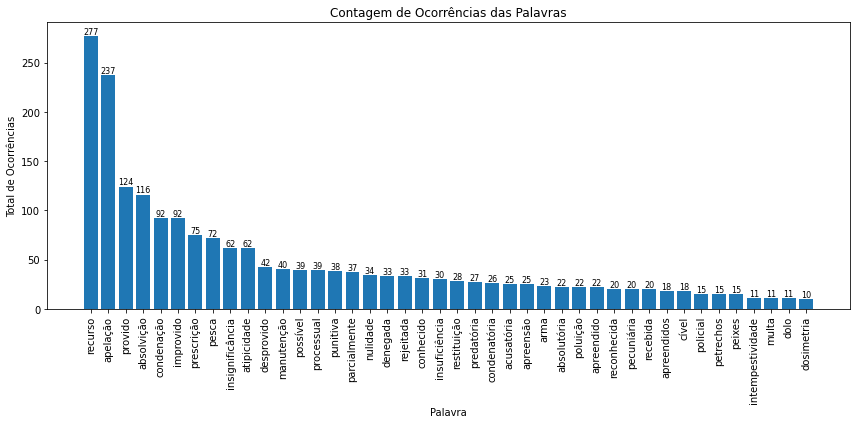

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fornecidos
dados = {'Palavra': ['recurso', 'apelação', 'provido', 'absolvição', 'condenação', 'improvido', 'prescrição', 'pesca', 'insignificância', 'atipicidade', 'desprovido', 'manutenção', 'possível', 'processual', 'punitiva', 'parcialmente', 'nulidade', 'denegada', 'rejeitada', 'conhecido', 'insuficiência', 'restituição', 'predatória', 'condenatória', 'acusatória', 'apreensão', 'arma', 'absolutória', 'poluição', 'apreendido', 'recebida', 'reconhecida', 'pecuniária', 'apreendidos', 'cível', 'policial', 'petrechos', 'peixes', 'intempestividade', 'multa', 'dolo', 'dosimetria'],
         'Total Ocorrências': [277, 237, 124, 116, 92, 92, 75, 72, 62, 62, 42, 40, 39, 39, 38, 37, 34, 33, 33, 31, 30, 28, 27, 26, 25, 25, 23, 22, 22, 22, 20, 20, 20, 18, 18, 15, 15, 15, 11, 11, 11, 10]}

# Criar DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Ordenar o DataFrame por Total Ocorrências em ordem decrescente
df = df.sort_values(by='Total Ocorrências', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df['Palavra'], df['Total Ocorrências'])

plt.xlabel('Palavra')
plt.ylabel('Total de Ocorrências')
plt.title('Contagem de Ocorrências das Palavras')

# Adicionar as quantidades acima de cada barra
for i, v in enumerate(df['Total Ocorrências']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('grafico_barras_contagemPalavras.png')

# Exibir o gráfico de barras
plt.show()


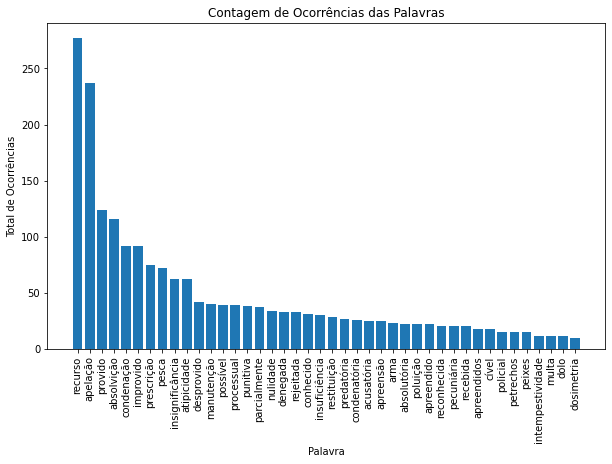

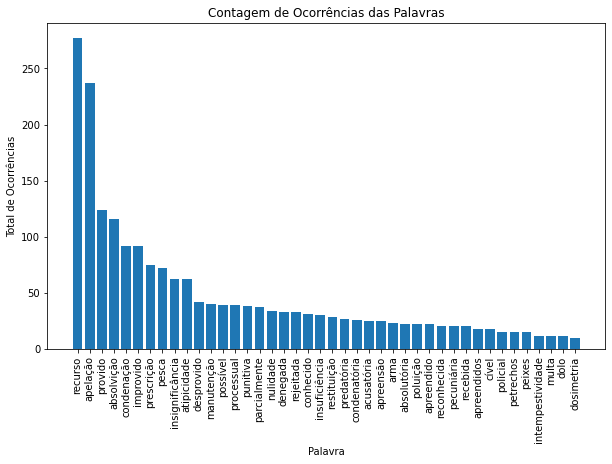

In [ ]:
#print(df.columns)
soma = df['Ementa'].str.contains('improcedência', case=False).sum()
print(soma)

In [ ]:
soma = df['Ementa'].str.contains('procedência', case=False).sum()
print(soma)

In [ ]:
#print(df.columns)
soma = df['Ementa'].str.contains('crime ambiental', case=False).sum()
print(soma)

In [ ]:
#print(df.columns)
soma = df['Ementa'].str.contains('ação civil pública', case=False).sum()
print(soma)

In [ ]:
soma = df['Ementa'].str.contains('9.605/98', case=False).sum()
print(soma)

In [ ]:
soma = df['Ementa'].str.contains('habeas corpus', case=False).sum()
print(soma)

In [56]:
soma = df['Ementa'].str.contains('crime ambiental', case=False).sum()
print(soma)

398


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Converter a coluna 'Data do julgamento' para o formato de data
df['Data do julgamento'] = pd.to_datetime(df['Data do julgamento'])

# Criar a nova coluna 'Ano do Julgamento' com o ano do julgamento
df['Ano do Julgamento'] = df['Data do julgamento'].dt.year

# Agrupar os processos por ano do julgamento e contar a quantidade de processos em cada ano
contagem_processos_ano = df.groupby('Ano do Julgamento')['Processo'].count()

# Criar um array de valores de tempo para a regressão linear
X = np.arange(len(contagem_processos_ano)).reshape(-1, 1)

# Criar um array de valores da série temporal
y = contagem_processos_ano.values.reshape(-1, 1)

# Criar o objeto de regressão linear
regressor = LinearRegression()

# Ajustar a regressão linear aos dados
regressor.fit(X, y)

# Obter o coeficiente angular da reta
coef_angular = regressor.coef_[0][0]

# Criar o gráfico de série temporal
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(contagem_processos_ano.index, contagem_processos_ano.values, marker='o', linestyle='-')

ax.set_xlabel('Ano do Julgamento')
ax.set_ylabel('Quantidade de Processos')
ax.set_title('Quantidade de Processos Julgados por Ano')

# Exibir o coeficiente angular no gráfico
ax.text(0.05, 0.95, f'Coeficiente Angular: {coef_angular:.2f}', transform=ax.transAxes, ha='left', va='top')
plt.savefig('grafico_temporal_pontos.png')
# Exibir o gráfico
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Converter a coluna 'Data do julgamento' para o formato de data
df['Data do julgamento'] = pd.to_datetime(df['Data do julgamento'])

# Criar a nova coluna 'Ano do Julgamento' com o ano do julgamento
df['Ano do Julgamento'] = df['Data do julgamento'].dt.year

# Agrupar os processos por ano do julgamento e somar a quantidade de processos em cada ano
soma_processos_ano = df.groupby('Ano do Julgamento')['Processo'].count()

# Criar um array de valores de tempo para a regressão linear
X = np.arange(len(soma_processos_ano)).reshape(-1, 1)

# Criar um array de valores da série temporal (soma dos processos por ano)
y = soma_processos_ano.values.reshape(-1, 1)

# Criar o objeto de regressão linear
regressor = LinearRegression()

# Ajustar a regressão linear aos dados
regressor.fit(X, y)

# Obter o coeficiente angular da reta
coef_angular = regressor.coef_[0][0]

# Obter as coordenadas x e y da reta de regressão
x_reta = np.arange(2000, 2023).reshape(-1, 1)
y_reta = regressor.predict(x_reta - 2000).flatten()

# Criar o gráfico de dispersão com a reta de regressão
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(soma_processos_ano.index, soma_processos_ano.values, color='blue', label='Pontos de Dados')
ax.plot(x_reta, y_reta, color='red', linestyle='--', label='Reta de Regressão')

# Exibir o coeficiente angular no gráfico
ax.text(0.95, 0.05, f'Coeficiente Angular: {coef_angular:.2f}', transform=ax.transAxes, ha='right', va='baseline')

ax.set_xlabel('Ano do Julgamento')
ax.set_ylabel('Somatório de Processos')
ax.set_title('Somatório de Processos Julgados por Ano')
ax.legend()
plt.savefig('grafico_temporal_regressao.png')
# Exibir o gráfico
plt.show()


In [ ]:
# Definir o próximo período a ser previsto
proximo_periodo = 2023

# Calcular o valor previsto para o próximo período
valor_previsto = regressor.predict([[proximo_periodo - 2000]])

print(f'Previsão para o próximo período ({proximo_periodo}): {valor_previsto[0][0]} processos')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'Data do julgamento' para o formato de data
df['Data do julgamento'] = pd.to_datetime(df['Data do julgamento'])

# Criar a nova coluna 'Ano do Julgamento' com o ano do julgamento
df['Ano do Julgamento'] = df['Data do julgamento'].dt.year

# Agrupar os processos por ano do julgamento e contar a quantidade de processos em cada ano
contagem_processos_ano = df.groupby('Ano do Julgamento')['Processo'].count()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(contagem_processos_ano.index, contagem_processos_ano.values, color='steelblue')

#ax.set_xlabel('Ano do Julgamento')
ax.set_ylabel('Quantidade de ementas')
ax.set_title('Quantidade de julgamentos por ano')

# Definir todos os anos como marcadores no eixo x
ax.set_xticks(contagem_processos_ano.index)

# Criar o gráfico de barras e atribuir o resultado a bar_plot
bar_plot = plt.bar(contagem_processos_ano.index, contagem_processos_ano)
# Adicionar a legenda acima de cada barra
for bar in bar_plot:
    height = bar.get_height()
    ax.annotate(height, xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', va='bottom')


# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('grafico_barra_ano.png')

contagem_processos_ano = contagem_processos_ano.reset_index()  # Converter o índice em coluna
contagem_processos_ano.to_csv('contagem_processos_ano.csv', index=False)
# Exibir o gráfico
plt.show()



In [ ]:
contagem_processos = df.groupby('Comarca')['Processo'].count()
contagem_processos = contagem_processos.reset_index()  # Converter o índice em coluna
print(contagem_processos)
contagem_processos.to_csv('contagem_processos_municipios.csv', index=False)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

contagem_assunto = df.groupby('Classe/Assunto')['Processo'].count()
contagem_assunto = contagem_assunto.reset_index()  # Converter o índice em coluna
#print(contagem_assunto)
#contagem_assunto.to_csv('contagem_assunto.csv', index=False)



# Calcular a média e o desvio padrão do número de ocorrências por município
ocorrencias_assunto = df['Classe/Assunto'].value_counts()
media = ocorrencias_assunto.mean()
desvio_padrao = ocorrencias_assunto.std()

# Agrupar os municípios com menos ocorrências em um único elemento chamado 'Outros'
outros = ocorrencias_assunto[ocorrencias_assunto < (media - 0.05* desvio_padrao)]
ocorrencias_assunto = ocorrencias_assunto.drop(outros.index)
ocorrencias_assunto['Outros'] = outros.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(ocorrencias_assunto)), ocorrencias_assunto.values, width=0.6, color='steelblue')
ax.set_xticks(range(len(ocorrencias_assunto)))
ax.set_xticklabels(ocorrencias_assunto.index)
#ax.set_xlabel('Comarca')
ax.set_ylabel('Quantidade de ementas')

# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)

# Exibir a legenda
for i, v in enumerate(ocorrencias_assunto.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Exibir o gráfico
#plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('grafico_barras.png')
#plt.show()


In [ ]:
import pandas as pd

# Calcular as contagens dos assuntos
ocorrencias_assunto = df['Classe/Assunto'].value_counts()

# Selecionar os 15 elementos mais significativos
#ocorrencias_assunto = ocorrencias_assunto.head(15)

# Resetar o índice e salvar como um arquivo Excel
ocorrencias_assunto = ocorrencias_assunto.reset_index()
ocorrencias_assunto.to_excel('classeAssunto.xlsx', index=False)

In [ ]:
# Calcular as contagens dos assuntos
ocorrencias_assunto = df['Classe/Assunto'].value_counts()

# Selecionar os 15 elementos mais significativos
ocorrencias_assunto = ocorrencias_assunto.head(15)

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(ocorrencias_assunto)), ocorrencias_assunto.values, width=0.6, color='steelblue')
ax.set_xticks(range(len(ocorrencias_assunto)))
ax.set_xticklabels(ocorrencias_assunto.index)
ax.set_ylabel('Quantidade de ementas')

# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)

# Exibir a legenda
for i, v in enumerate(ocorrencias_assunto.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Exibir o gráfico
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('grafico_barras.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média e o desvio padrão do número de ocorrências por município
ocorrencias_municipio = df['Comarca'].value_counts()
media = ocorrencias_municipio.mean()
desvio_padrao = ocorrencias_municipio.std()

# Agrupar os municípios com menos ocorrências em um único elemento chamado 'Outros'
outros = ocorrencias_municipio[ocorrencias_municipio < (media - 0.25 * desvio_padrao)]
ocorrencias_municipio = ocorrencias_municipio.drop(outros.index)
ocorrencias_municipio['Outros'] = outros.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(ocorrencias_municipio)), ocorrencias_municipio.values, width=0.6, color='steelblue')
ax.set_xticks(range(len(ocorrencias_municipio)))
ax.set_xticklabels(ocorrencias_municipio.index)
#ax.set_xlabel('Comarca')
ax.set_ylabel('Quantidade de ementas')

# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)

# Exibir a legenda
for i, v in enumerate(ocorrencias_municipio.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Exibir o gráfico
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('grafico_barras.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média e o desvio padrão do número de ocorrências por relator
ocorrencias_relator = df['Relator(a)'].value_counts()
print(ocorrencias_relator)
media = ocorrencias_relator.mean()
desvio_padrao = ocorrencias_relator.std()

# Agrupar os relatores com menos ocorrências em um único elemento chamado 'Outros'
outros = ocorrencias_relator[ocorrencias_relator < (media - 0.6 * desvio_padrao)]
ocorrencias_relator = ocorrencias_relator.drop(outros.index)
ocorrencias_relator['Outros'] = outros.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(range(len(ocorrencias_relator)), ocorrencias_relator.values, width=0.50, color='orange')
ax.set_xticks(range(len(ocorrencias_relator)))
ax.set_xticklabels(ocorrencias_relator.index)
#ax.set_xlabel('Comarca')
ax.set_ylabel('Quantidade de ementas por relator')

# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)

# Exibir a legenda
for i, v in enumerate(ocorrencias_relator.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Exibir o gráfico
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('grafico_barras_relator.png')
plt.show()

# Contar o número de relatores diferentes
num_relatores = df['Relator(a)'].nunique()
print("Número de relatores diferentes:", num_relatores)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média e o desvio padrão do número de ocorrências por relator
ocorrencias_relator = df['Relator(a)'].value_counts()
media = ocorrencias_relator.mean()
desvio_padrao = ocorrencias_relator.std()

# Agrupar os relatores com menos ocorrências em um único elemento chamado 'Outros'
outros = ocorrencias_relator[ocorrencias_relator < (media - 0.6 * desvio_padrao)]
ocorrencias_relator = ocorrencias_relator.drop(outros.index)
ocorrencias_relator['Outros'] = outros.sum()

# Ordenar os relatores em ordem decrescente de ocorrências
ocorrencias_relator = ocorrencias_relator.sort_values(ascending=False)

# Calcular a porcentagem acumulada das ocorrências
ocorrencias_cumulativas = ocorrencias_relator.cumsum() / ocorrencias_relator.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(range(len(ocorrencias_relator)), ocorrencias_relator.values, width=0.4, color='orange')
ax.set_xticks(range(len(ocorrencias_relator)))
ax.set_xticklabels(ocorrencias_relator.index)
ax.set_ylabel('Quantidade de ementas por relator')

# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)

# Exibir a legenda
for i, v in enumerate(ocorrencias_relator.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Criar a curva ABC
ax2 = ax.twinx()
ax2.plot(range(len(ocorrencias_relator)), ocorrencias_cumulativas, color='red', marker='o')
ax2.set_ylabel('Porcentagem acumulada')

# Exibir o gráfico
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('grafico_barras_relator_pareto.png')
plt.show()

# Contar o número de relatores diferentes
num_relatores = df['Relator(a)'].nunique()
print("Número de relatores diferentes:", num_relatores)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média e o desvio padrão do número de ocorrências por relator
ocorrencias_relator = df['Relator(a)'].value_counts()
media = ocorrencias_relator.mean()
desvio_padrao = ocorrencias_relator.std()

# Agrupar os relatores com menos ocorrências em um único elemento chamado 'Outros'
outros = ocorrencias_relator[ocorrencias_relator < (media - 0.2 * desvio_padrao)]
ocorrencias_relator = ocorrencias_relator.drop(outros.index)

# Ordenar os relatores em ordem decrescente de ocorrências
ocorrencias_relator = ocorrencias_relator.sort_values(ascending=False)

# Calcular a porcentagem acumulada das ocorrências
ocorrencias_cumulativas = ocorrencias_relator.cumsum() / ocorrencias_relator.sum()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(range(len(ocorrencias_relator)), ocorrencias_relator.values, width=0.4, color='orange')
ax.set_xticks(range(len(ocorrencias_relator)))
ax.set_xticklabels(ocorrencias_relator.index)
ax.set_ylabel('Quantidade de ementas por relator')

# Girar os rótulos do eixo x em 90 graus para facilitar a leitura
plt.xticks(rotation=90)

# Exibir a legenda
for i, v in enumerate(ocorrencias_relator.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Criar a curva ABC
ax2 = ax.twinx()
ax2.plot(range(len(ocorrencias_relator)), ocorrencias_cumulativas, color='red', marker='o')
ax2.set_ylabel('Porcentagem acumulada')

# Exibir o gráfico
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('grafico_barras_relator.png')
plt.show()

# Contar o número de relatores diferentes
num_relatores = df['Relator(a)'].nunique()
print("Número de relatores diferentes:", num_relatores)


In [ ]:
print(df.columns)
#contagem = df['ementa'].str.count('ementa')e


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Cria um objeto CountVectorizer
vectorizer = CountVectorizer()

# Cria a matriz de frequência de palavras
matriz_freq = vectorizer.fit_transform(df['Ementa'])
print(matriz_freq.toarray())
print(matriz_freq.shape)
print(vectorizer.get_feature_names())



In [ ]:
# Agrupa os dados pela coluna "Comarca" e soma as ocorrências da palavra "absolvição" na coluna "Ementa" para cada grupo
soma_absolvicao = df[df['Ementa'].str.contains('absolvição', case=False)].groupby('Comarca')['Ementa'].apply(lambda x: (x.str.count('absolvição').sum()))

# Exibe o resultado
print(soma_absolvicao)


In [67]:
'''
usar expressões regulares para remover 
os caracteres que deseja 
excluir da matriz de frequência de palavras.
a função tokenizer_palavras remove números (\d+), 
caracteres especiais (\W+), as strings "", "(...)",
"(c)", ", " e ". " (("|\.\.\.|[cC]\)|[a-zA-Z]?")) do
documento antes de dividi-lo em palavras.
O caractere | é usado para separar
cada uma das expressões regulares.

'''
from sklearn.feature_extraction.text import CountVectorizer
import re

# Define um novo tokenizador que remove caracteres indesejados
def tokenizer_palavras(doc):
    # Remove números, caracteres especiais e outras strings indesejadas do documento
    doc = re.sub(r'\d+|\W+|("|\.\.\.|[cC]\)|[a-zA-Z]?")', ' ', doc)
    # Divide o documento em palavras
    tokens = doc.split()
    return tokens


# Cria um objeto CountVectorizer com o novo tokenizador e um máximo de 1000 palavras
vectorizer = CountVectorizer(tokenizer=tokenizer_palavras, max_features=1000)

# Cria a matriz de frequência de palavras com no máximo 1000 palavras
matriz_freq = vectorizer.fit_transform(df['Ementa'])

# Cria um objeto CountVectorizer com o novo tokenizador
vectorizer = CountVectorizer(tokenizer=tokenizer_palavras)

# Cria a matriz de frequência de palavras sem os caracteres indesejados
matriz_freq = vectorizer.fit_transform(df['Ementa'])
#print(matriz_freq.toarray())
#print(matriz_freq.shape)
#print(vectorizer.get_feature_names())
# Cria um novo DataFrame com as colunas relevantes para a análise
df_relevante = df[['Comarca', 'Data do julgamento', 'Ementa']]
print(df_relevante)


# Cria a matriz de frequência de palavras
matriz_freq = vectorizer.fit_transform(df_relevante['Ementa'])

# Concatena a matriz de frequência de palavras com o DataFrame relevante
df_freq = pd.DataFrame(matriz_freq.toarray(), columns=vectorizer.get_feature_names_out())
df_concat = pd.concat([df_relevante, df_freq], axis=1)

# Calcula as correlações entre as colunas da matriz de frequência de palavras e as demais colunas do DataFrame
correlacoes = df_concat.corr()

# Exibe as correlações com a coluna "Comarca"
print(correlacoes['Comarca'])



KeyError: 'Ementa'

In [68]:
# Cria um novo DataFrame com as colunas relevantes para a análise
df_relevante = df[['Comarca', 'Data do julgamento', 'Ementa']]

# Cria a matriz de frequência de palavras
matriz_freq = vectorizer.fit_transform(df_relevante['Ementa'])

# Concatena a matriz de frequência de palavras com o DataFrame relevante
df_freq = pd.DataFrame(matriz_freq.toarray(), columns=vectorizer.get_feature_names_out())
df_concat = pd.concat([df_relevante, df_freq], axis=1)

# Calcula as correlações entre as colunas da matriz de frequência de palavras e as demais colunas do DataFrame
correlacoes = df_concat.corr()

# Exibe as correlações com a coluna "Comarca"
print(correlacoes['Comarca'])



KeyError: "None of [Index(['Comarca', 'Data do julgamento', 'Ementa'], dtype='object')] are in the [columns]"

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Define um novo tokenizador que remove caracteres indesejados
def tokenizer_palavras(doc):
    # Remove números, caracteres especiais e outras strings indesejadas do documento
    doc = re.sub(r'\d+|\W+|("|\.\.\.|[cC]\)|[a-zA-Z]?")', ' ', doc)
    # Divide o documento em palavras
    tokens = doc.split()
    return tokens

# Cria um objeto CountVectorizer com o novo tokenizador e um máximo de 1000 palavras
vectorizer = CountVectorizer(tokenizer=tokenizer_palavras, max_features=1000)

# Cria a matriz de frequência de palavras
matriz_freq = vectorizer.fit_transform(df['Ementa'])

# Cria um novo DataFrame com as colunas relevantes para a análise
df_relevante = df[['Comarca', 'Data do julgamento', 'Ementa']]

# Concatena a matriz de frequência de palavras com o DataFrame relevante
df_freq = pd.DataFrame(matriz_freq.toarray(), columns=vectorizer.get_feature_names_out())
df_concat = pd.concat([df_relevante, df_freq], axis=1)

# Verifica se a coluna "Comarca" está presente no DataFrame
print('Colunas do DataFrame:', df_concat.columns)

# Transforma a coluna "Comarca" em variável numérica
df_concat['Comarca_num'] = pd.factorize(df_concat['Comarca'])[0]

# Calcula as correlações entre as colunas da matriz de frequência de palavras e as demais colunas do DataFrame
correlacoes = df_concat.corr()

# Exibe as correlações com a coluna "Comarca"
print(correlacoes['Comarca_num'])


KeyError: 'Ementa'

In [70]:
import matplotlib.pyplot as plt

# Calcula a média das frequências de cada palavra para cada comarca
df_media_freq = df_concat.groupby('Comarca')['a', 'absolvição', 'acerca', ...].mean()

# Plota o gráfico de dispersão
plt.scatter(x=df_media_freq.index, y=df_media_freq['a'])
plt.xlabel('Comarca')
plt.ylabel('Média das frequências de "absolvição"')
plt.show()


NameError: name 'df_concat' is not defined

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import pandas as pd

# Define um novo tokenizador que remove caracteres indesejados
def tokenizer_palavras(doc):
    # Remove números, caracteres especiais e outras strings indesejadas do documento
    doc = re.sub(r'\d+|\W+|("|\.\.\.|[cC]\)|[a-zA-Z]?")', ' ', doc)
    # Divide o documento em palavras
    tokens = doc.split()
    return tokens

# Cria um objeto CountVectorizer com o novo tokenizador e a palavra "absolvição" como vocabulário
vectorizer = CountVectorizer(tokenizer=tokenizer_palavras, vocabulary=['absolvição'])

# Cria a matriz de frequência de palavras com a palavra "absolvição"
matriz_freq = vectorizer.fit_transform(df['Ementa'])

# Cria um novo DataFrame com a coluna "Comarca" e a matriz de frequência de palavras
df_freq = pd.DataFrame(matriz_freq.toarray(), columns=vectorizer.get_feature_names())
df_concat = pd.concat([df[['Comarca']], df_freq], axis=1)

# Calcula as correlações entre a coluna "Comarca" e a palavra "absolvição"
correlacoes = df_concat.corr()

# Exibe as correlações
print(correlacoes['Comarca']['absolvição'])


KeyError: 'Ementa'